In [23]:
from pyod.utils.data import generate_data
from pyod.models.ocsvm import OCSVM
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from pyod.models.deep_svdd import DeepSVDD
from sklearn.svm import OneClassSVM
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from pyod.utils.utility import standardizer

In [24]:
def compute_balanced_accuracy(pred, labels):
    tp, fn, fp, tn=confusion_matrix(labels, pred).ravel()
    sensitivity=tp/(tp+fn)
    specifity=tn/(fp+tn)
    balanced_accuracy=(specifity + sensitivity)/2
    return balanced_accuracy


In [56]:
#1
X_train, X_test, y_train, y_test=generate_data(n_train=300,n_test=200,n_features=3,contamination=0.15)
ocsvm=OCSVM(kernel="linear",contamination=0.15)
ocsvm.fit(X_train)
pred=ocsvm.predict(X_test)
score=ocsvm.decision_function(X_test)
ba=compute_balanced_accuracy(pred,y_test)
roc=roc_auc_score(pred,score)
print(f"Balanced accuracy: {ba}, roc:{roc}")


Balanced accuracy: 0.9637254901960784, roc:1.0


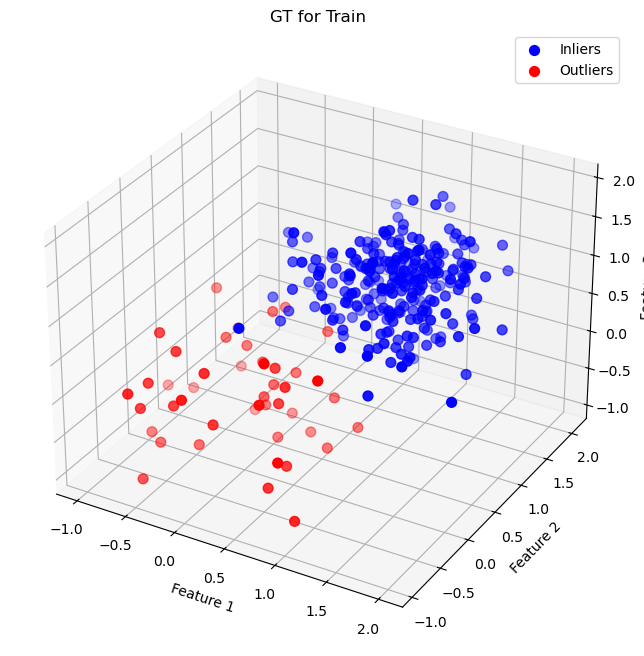

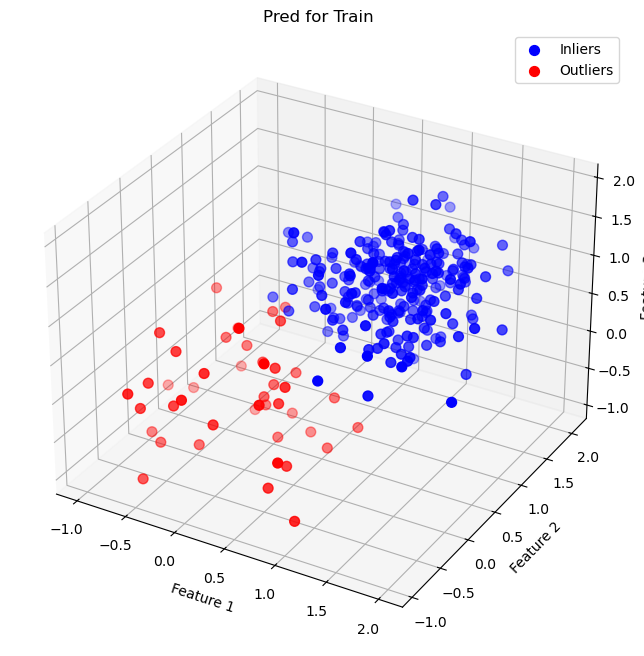

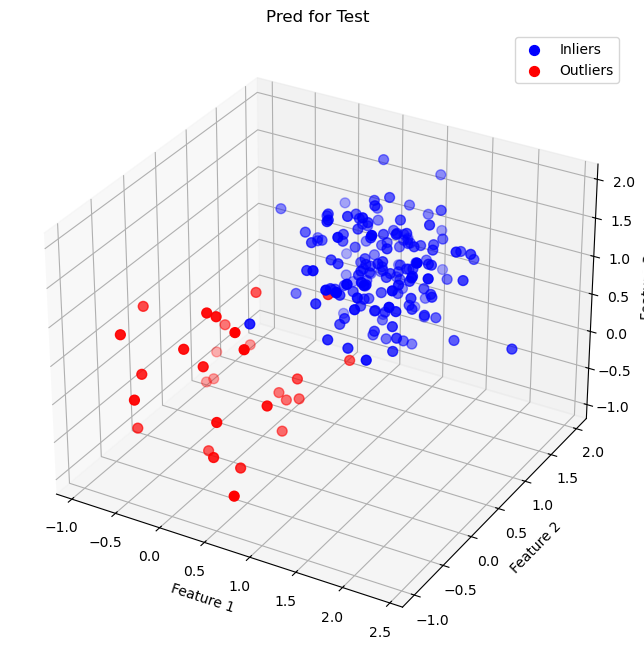

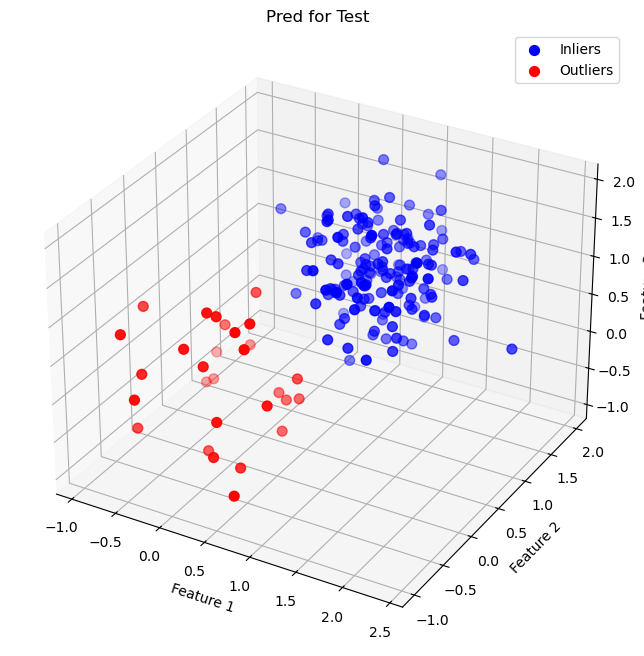

In [57]:
pred_train=ocsvm.predict(X_train)
pred_test=ocsvm.predict(X_test)
def plot_3d(X, y, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    inliers = X[y == 0]
    outliers = X[y == 1]
    
    ax.scatter(inliers[:, 0], inliers[:, 1], inliers[:, 2], c='blue', label='Inliers', s=50)
    ax.scatter(outliers[:, 0], outliers[:, 1], outliers[:, 2], c='red', label='Outliers', s=50)
    
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)
    ax.legend()
    plt.show()

plot_3d(X_train,y_train,"GT for Train")
plot_3d(X_train,pred_train,"Pred for Train")
plot_3d(X_test,y_test,"Pred for Test")
plot_3d(X_test,pred_test,"Pred for Test")

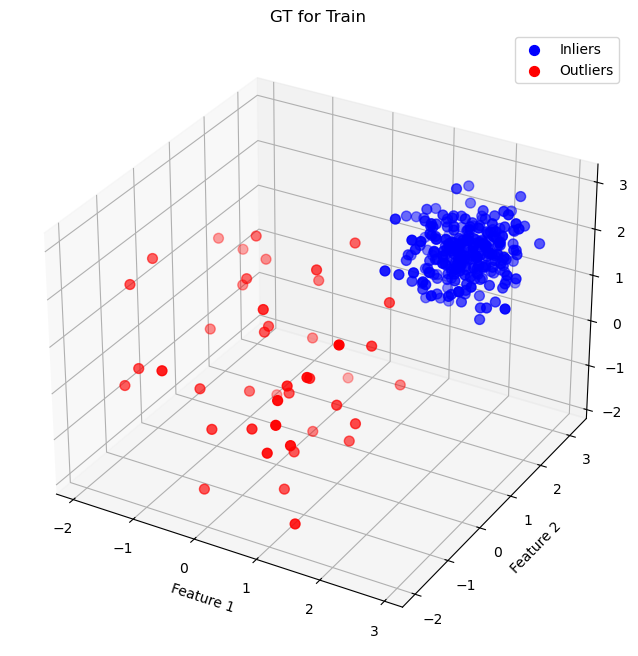

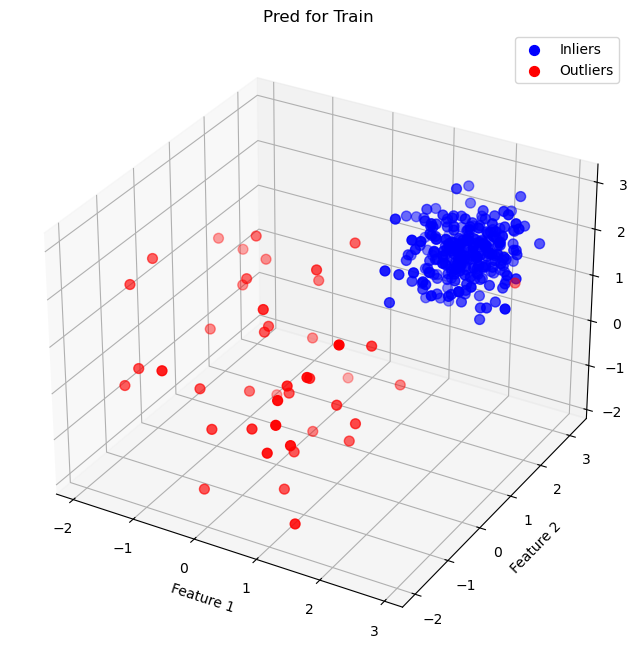

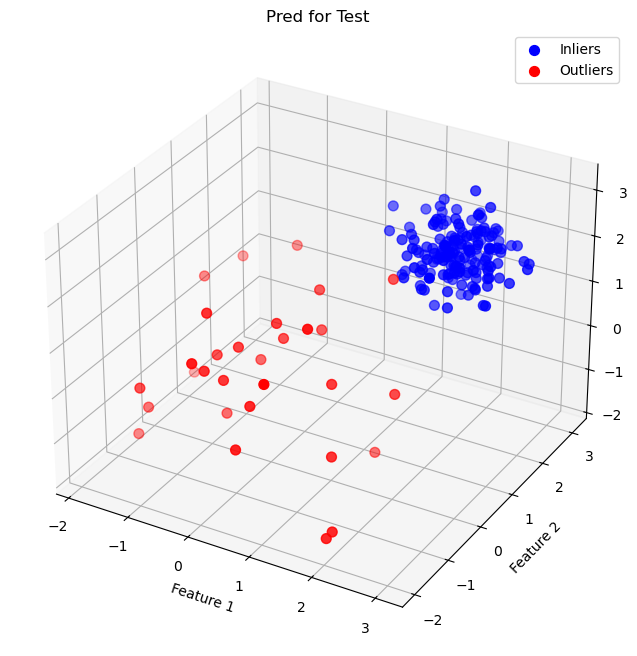

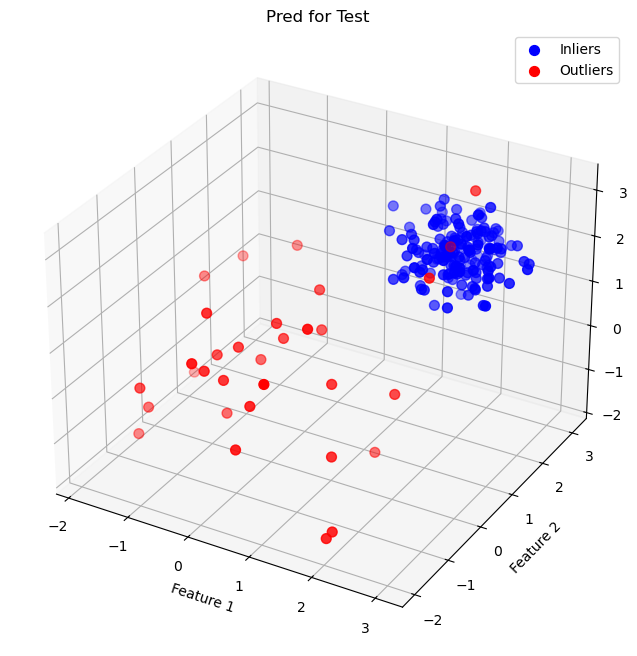

In [18]:
ocsvm=OCSVM(kernel="rbf",contamination=0.15)
ocsvm.fit(X_train)
pred_train=ocsvm.predict(X_train)
pred_test=ocsvm.predict(X_test)

plot_3d(X_train,y_train,"GT for Train")
plot_3d(X_train,pred_train,"Pred for Train")
plot_3d(X_test,y_test,"Pred for Test")
plot_3d(X_test,pred_test,"Pred for Test")

Epoch 1/100, Loss: 9.593592539429665
Epoch 2/100, Loss: 9.000035226345062
Epoch 3/100, Loss: 9.353186935186386
Epoch 4/100, Loss: 8.767533637583256
Epoch 5/100, Loss: 9.512527257204056
Epoch 6/100, Loss: 8.949349462985992
Epoch 7/100, Loss: 9.13821879029274
Epoch 8/100, Loss: 8.829848960042
Epoch 9/100, Loss: 9.549314618110657
Epoch 10/100, Loss: 9.152546793222427
Epoch 11/100, Loss: 9.175740718841553
Epoch 12/100, Loss: 9.426091253757477
Epoch 13/100, Loss: 8.830733582377434
Epoch 14/100, Loss: 9.388511627912521
Epoch 15/100, Loss: 8.825859561562538
Epoch 16/100, Loss: 8.851089969277382
Epoch 17/100, Loss: 9.472180932760239
Epoch 18/100, Loss: 8.84234568476677
Epoch 19/100, Loss: 8.820631504058838
Epoch 20/100, Loss: 9.47215661406517
Epoch 21/100, Loss: 8.81112191081047
Epoch 22/100, Loss: 8.83879840373993
Epoch 23/100, Loss: 9.48504364490509
Epoch 24/100, Loss: 9.038724780082703
Epoch 25/100, Loss: 9.20968183875084
Epoch 26/100, Loss: 9.824813067913055
Epoch 27/100, Loss: 9.500923901

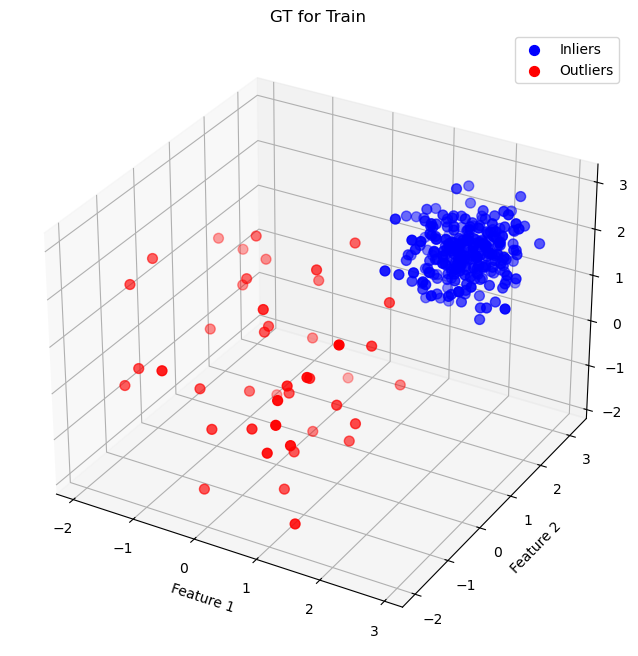

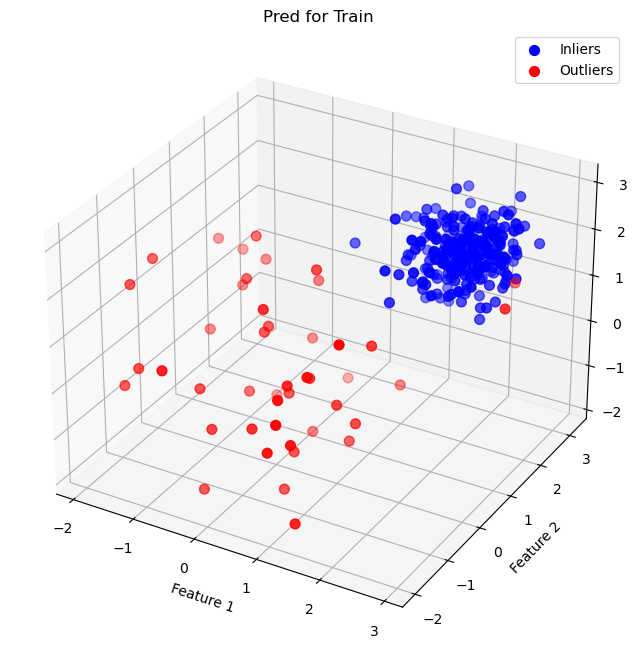

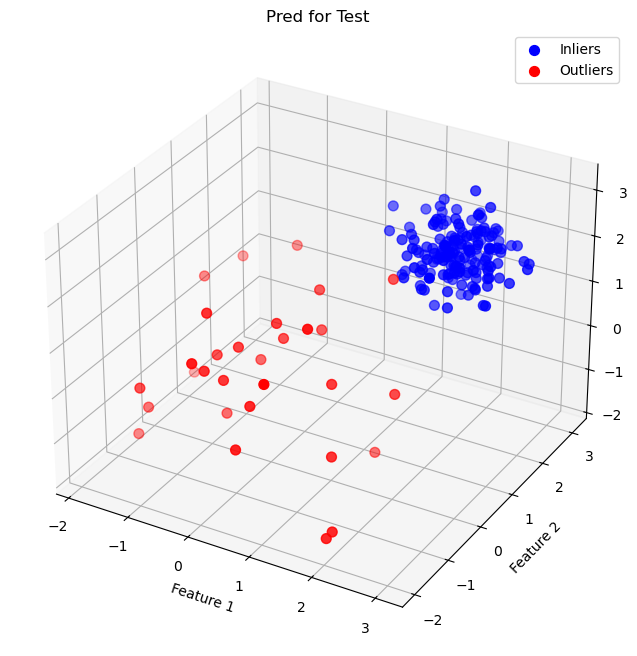

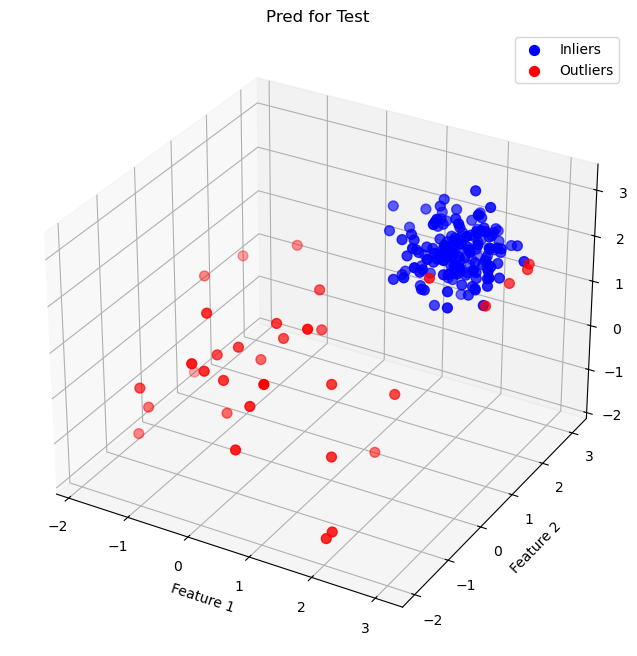

In [24]:
deep_svd=DeepSVDD(3,contamination=0.15)
deep_svd.fit(X_train)
pred_train=deep_svd.predict(X_train)
pred_test=deep_svd.predict(X_test)
score=ocsvm.decision_function(X_test)
ba=compute_balanced_accuracy(pred_test,y_test)
roc=roc_auc_score(pred,score)
print(f"Balanced accuracy: {ba}, roc:{roc}")

plot_3d(X_train,y_train,"GT for Train")
plot_3d(X_train,pred_train,"Pred for Train")
plot_3d(X_test,y_test,"Pred for Test")
plot_3d(X_test,pred_test,"Pred for Test")

In [16]:
#2
data=loadmat("cardio.mat")
X_train, X_test, y_train, y_test = train_test_split(data["X"], data["y"], test_size=0.4,random_state=42)
y_train = np.where(y_train == 1, -1, np.where(y_train == 0, 1, y_train))
y_test = np.where(y_test == 1, -1, np.where(y_test == 0, 1, y_test))
svm = OneClassSVM()
param_grid = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'nu': [0.1, 0.2, 0.5, 0.7, 0.9]
}
balanced_accuracy = make_scorer(balanced_accuracy_score)
grid_search = GridSearchCV(svm, param_grid,scoring=balanced_accuracy,cv=5,
    n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=OneClassSVM(), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                         'nu': [0.1, 0.2, 0.5, 0.7, 0.9]},
             scoring=make_scorer(balanced_accuracy_score))

In [20]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

test_balanced_accuracy = compute_balanced_accuracy(y_pred, y_test)
print(f"Test set balanced accuracy: {test_balanced_accuracy}")

Test set balanced accuracy: 0.8760714432186358


In [21]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('oneclasssvm', OneClassSVM())  
])

param_grid = {
    'oneclasssvm__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'oneclasssvm__gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'oneclasssvm__nu': [0.1, 0.2, 0.5, 0.7, 0.9]
}
grid_search = GridSearchCV(pipeline, param_grid,scoring=balanced_accuracy,cv=5,
    n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

test_balanced_accuracy = compute_balanced_accuracy(y_pred, y_test)
print(f"Test set balanced accuracy: {test_balanced_accuracy}")
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Test set balanced accuracy: 0.885104375999672
Best Parameters: {'oneclasssvm__gamma': 0.01, 'oneclasssvm__kernel': 'rbf', 'oneclasssvm__nu': 0.2}


In [29]:
#3
data=loadmat("shuttle.mat")
X_train, X_test, y_train, y_test = train_test_split(data["X"], data["y"], test_size=0.5,random_state=42)
X_train_norm, X_test_norm = standardizer(X_train, X_test)

c_rate=sum([1 for y in y_train if y==1])/len(y_train)
print(X_train_norm.shape)

deep_svd=DeepSVDD(9,contamination=c_rate)
deep_svd.fit(X_train)
pred_test_deep=deep_svd.predict(X_test)
score_deep=deep_svd.decision_function(X_test)

ocsvm=OCSVM(kernel="rbf",contamination=c_rate)
ocsvm.fit(X_train)
pred_test_svm=ocsvm.predict(X_test)
score_ocsvm=ocsvm.decision_function(X_test)

auc=roc_auc_score(y_test,score_deep)
test_balanced_accuracy = compute_balanced_accuracy(pred_test_deep,y_test)
print(f"Test set balanced accuracy deep_svd: {test_balanced_accuracy}")
print(f"Test set ROC AUC using deep_svd: {auc}")

auc=roc_auc_score(y_test,score_ocsvm)
test_balanced_accuracy = compute_balanced_accuracy(pred_test_svm, y_test)
print(f"Test set balanced accuracy ocsvm: {test_balanced_accuracy}")
print(f"Test set ROC AUC using ocsvm: {auc}")

for neurons, activation in zip([[64,32,16],[128,64,32]],["relu","tanh"]):
    deep_svd=DeepSVDD(9,hidden_neurons=neurons,hidden_activation=activation)
    deep_svd.fit(X_train)
    pred_test_deep=deep_svd.predict(X_test)
    score_deep=deep_svd.decision_function(X_test)
    auc=roc_auc_score(y_test,score_deep)
    test_balanced_accuracy = compute_balanced_accuracy(pred_test_svm, y_test)
    print(f"Test set balanced accuracy deep_svd with {neurons} and activation {activation}: {test_balanced_accuracy}")
    print(f"Test set ROC AUC: {auc}")

    

(24548, 9)
Epoch 1/100, Loss: 810.8042188584805
Epoch 2/100, Loss: 811.9172083735466
Epoch 3/100, Loss: 810.6670074164867
Epoch 4/100, Loss: 810.6834187060595
Epoch 5/100, Loss: 811.707288980484
Epoch 6/100, Loss: 810.9361488372087
Epoch 7/100, Loss: 810.5970085412264
Epoch 8/100, Loss: 810.6362654268742
Epoch 9/100, Loss: 811.5483963191509
Epoch 10/100, Loss: 810.9515437185764
Epoch 11/100, Loss: 810.7012147456408
Epoch 12/100, Loss: 810.676598533988
Epoch 13/100, Loss: 810.779415011406
Epoch 14/100, Loss: 810.7192512154579
Epoch 15/100, Loss: 810.9226405322552
Epoch 16/100, Loss: 810.9386333376169
Epoch 17/100, Loss: 811.3562416434288
Epoch 18/100, Loss: 811.3354269564152
Epoch 19/100, Loss: 810.747823998332
Epoch 20/100, Loss: 810.7430547326803
Epoch 21/100, Loss: 810.804114818573
Epoch 22/100, Loss: 810.6123299077153
Epoch 23/100, Loss: 811.3408086746931
Epoch 24/100, Loss: 810.9622359275818
Epoch 25/100, Loss: 811.3972253799438
Epoch 26/100, Loss: 811.1923466920853
Epoch 27/100, L